<a href="https://colab.research.google.com/github/krishnadixit05/Google-Colab/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
dataset=pd.read_csv("/content/yahoofinance.csv")


In [ ]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-25,191.509995,191.979996,186.600006,188.740005,186.301483,43845300
1,2019-03-26,191.660004,192.880005,184.580002,186.789993,184.376678,49800500
2,2019-03-27,188.750000,189.759995,186.550003,188.470001,186.034973,29848400
3,2019-03-28,188.949997,189.559998,187.529999,188.720001,186.281738,20780400
4,2019-03-29,189.830002,190.080002,188.539993,189.949997,187.495865,23564000
...,...,...,...,...,...,...,...
248,2020-03-18,239.770004,250.000000,237.119995,246.669998,246.669998,75058400
249,2020-03-19,247.389999,252.839996,242.610001,244.779999,244.779999,67964300
250,2020-03-20,247.179993,251.830002,228.000000,229.240005,229.240005,100423300
251,2020-03-23,228.080002,228.500000,212.610001,224.369995,224.369995,83889900


In [ ]:
apple_training = dataset.iloc[:, 1:2].values

In [ ]:
#minmax scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
apple__processed = minmax.fit_transform(apple_training)

In [ ]:
#create the feature set with labels as output
feature_set= []
labels = []
for i in range(60,235):
  feature_set.append(apple__processed[i-60:i,0])
  labels.append(apple__processed[i,0])


In [ ]:
feature_set, labels = np.array(feature_set), np.array(labels)

In [ ]:
feature_set.shape

(175, 60)

In [ ]:
feature_set.reshape(feature_set.shape[0], feature_set.shape[1],1)

array([[[0.10763559],
        [0.10864034],
        [0.08914936],
        ...,
        [0.10790357],
        [0.1169457 ],
        [0.13804422]],

       [[0.10864034],
        [0.08914936],
        [0.09048892],
        ...,
        [0.1169457 ],
        [0.13804422],
        [0.16235762]],

       [[0.08914936],
        [0.09048892],
        [0.09638313],
        ...,
        [0.13804422],
        [0.16235762],
        [0.1669792 ]],

       ...,

       [[0.61286006],
        [0.60375079],
        [0.6105828 ],
        ...,
        [0.98586748],
        [0.95900874],
        [0.81594118]],

       [[0.60375079],
        [0.6105828 ],
        [0.61507029],
        ...,
        [0.95900874],
        [0.81594118],
        [0.84065653]],

       [[0.6105828 ],
        [0.61507029],
        [0.55505695],
        ...,
        [0.81594118],
        [0.84065653],
        [0.74407238]]])

In [ ]:
##build the LSTM model
feature_set.shape

(175, 60)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(units=60, return_sequences=True, input_shape=(feature_set.shape[1], 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(Dropout(0.20))

In [ ]:
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

In [ ]:
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.20))

In [ ]:
model.add(LSTM(units=60))
model.add(Dropout(0.20))

In [ ]:
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(feature_set, labels, epochs=100, batch_size=32)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.2361
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0574
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0380
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0161
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0099
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0108
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0113
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0071
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0058
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0071
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0062
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - loss: 0.0057
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 0.0061
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0068
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0058
Epoc

In [ ]:
testing_data=dataset.iloc[:,1:2].values
test_features=testing_data

In [ ]:
test_features=test_features.reshape(-1,1)
test_features=minmax.transform(test_features)

In [ ]:
testing_features=[]
for i in range(60,235):
  testing_features.append(test_features[i-60:i,0])

In [ ]:
testing_features=np.array(testing_features)

In [ ]:
testing_features=np.reshape(testing_features,(testing_features.shape[0],testing_features.shape[1],1))

In [ ]:
predictions=model.predict(testing_features)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


In [ ]:
predictions

array([[0.12151127],
       [0.1249374 ],
       [0.12894773],
       [0.13345982],
       [0.13826248],
       [0.14317569],
       [0.14801398],
       [0.15271828],
       [0.15715937],
       [0.16137375],
       [0.16538496],
       [0.16927202],
       [0.17302303],
       [0.17669874],
       [0.18015043],
       [0.1833971 ],
       [0.18644384],
       [0.18929352],
       [0.19201575],
       [0.1946255 ],
       [0.19722378],
       [0.19979714],
       [0.20236117],
       [0.20494989],
       [0.20764175],
       [0.21046588],
       [0.21348426],
       [0.21657318],
       [0.21981575],
       [0.22316493],
       [0.22685038],
       [0.230834  ],
       [0.23503621],
       [0.23902091],
       [0.24237216],
       [0.24483483],
       [0.24619669],
       [0.24654447],
       [0.24599218],
       [0.2448604 ],
       [0.24342863],
       [0.24188387],
       [0.24048594],
       [0.2395918 ],
       [0.23936965],
       [0.24003562],
       [0.2416979 ],
       [0.244

In [ ]:
predictions=minmax.inverse_transform(predictions)

In [ ]:
predictions

array([[193.58163],
       [194.09317],
       [194.69191],
       [195.36555],
       [196.08258],
       [196.81613],
       [197.53848],
       [198.24083],
       [198.9039 ],
       [199.53311],
       [200.13197],
       [200.71231],
       [201.27234],
       [201.82112],
       [202.33646],
       [202.82118],
       [203.27606],
       [203.70152],
       [204.10796],
       [204.49759],
       [204.88551],
       [205.26971],
       [205.65253],
       [206.03902],
       [206.44092],
       [206.86255],
       [207.31319],
       [207.77437],
       [208.2585 ],
       [208.75853],
       [209.30876],
       [209.90352],
       [210.5309 ],
       [211.12581],
       [211.62617],
       [211.99384],
       [212.19716],
       [212.2491 ],
       [212.16664],
       [211.99767],
       [211.78389],
       [211.55327],
       [211.34456],
       [211.21104],
       [211.17789],
       [211.27731],
       [211.5255 ],
       [211.89842],
       [212.36293],
       [212.87566],


In [ ]:
predictions = np.concatenate((np.zeros((60, 1)), predictions))

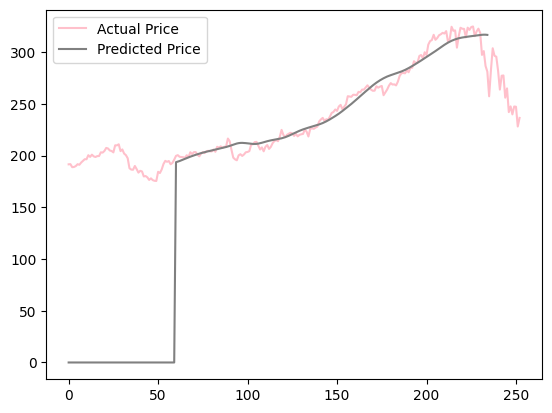

In [ ]:
plt.figure()
plt.plot(testing_data,color='pink',label="Actual Price")
plt.plot(predictions,color='gray', label="Predicted Price")
plt.legend()
plt.show()